In [6]:
import os
import numpy as np
import glob
import PIL.Image as Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary
import torch.optim as optim
from time import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
import os
sys.path.append('/zhome/45/0/155089/Deeplearning_in_computer_vision/Segmentation_project/Asignments_DeepLearningForCV/')  
from Performance_Metrics import dice_coefficient, intersection_over_union, accuracy,sensitivity, specificity
from DataLoader_PH2_weakpoints import PH2_weekpoints
from time import time  # Correct import
from torchvision.transforms import v2

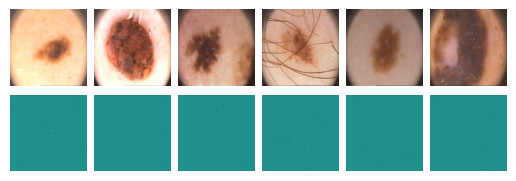

In [8]:
#Check if dataset looks okidoki
images, labels = next(iter(train_loader))

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.swapaxes(np.swapaxes(images[i], 0, 2), 0, 1))
    plt.axis('off')  

    plt.subplot(2, 6, i+7)
    plt.imshow(labels[i].squeeze())
    plt.axis('off')  

# Juster afstanden mellem subplots horisontalt (wspace=0 fjerner mellemrummet helt)
plt.subplots_adjust(wspace=0.1, hspace=-0.7)

plt.show()

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


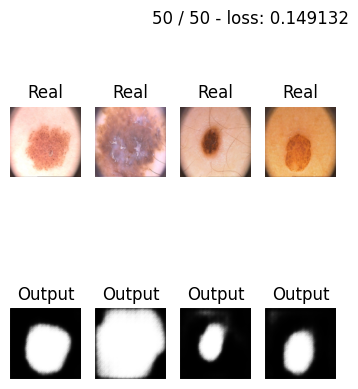

In [10]:
from Encoder_Decoder_PH2 import EncDec 
from UNet2 import bce_loss, dice_loss, focal_loss, bce_total_variation, focal_loss_chatten, stable_bce_loss, UNet2, bce_loss_weakpoints
from EncDecPH2_TRAINING_TESTING import train, test


size = 128
train_transform = transforms.Compose([transforms.Resize((size, size)), 
                                    transforms.ToTensor()])
metrics = []
for i in [5,10,15,20,30,40,50]:
    Full_set = PH2_weekpoints(transform=train_transform, number_of_points=5)

    train_val_set, test_set =  torch.utils.data.random_split(Full_set, [180, 20]) # 200 total 10 to test
    train_set, val_set = torch.utils.data.random_split(train_val_set, [150, 30]) # 150 for training and 30 for validation

    test_loader = DataLoader(test_set,batch_size= 5 , shuffle=False, num_workers=3)
    train_loader = DataLoader(train_set,batch_size= 17, shuffle=False, num_workers=3)
    val_loader = DataLoader(val_set, batch_size=5, shuffle=False, num_workers=3)
    model = EncDec().to(device)
    train(model, optim.Adam(model.parameters(), 0.001), bce_loss_weakpoints, 50, train_loader, val_loader)
    metrics.append(test(model, test_loader, bce_loss))

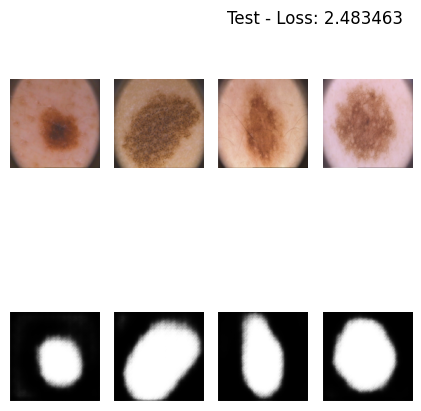

Dice: 2.0184, IoU: -109.9368, Accuracy: 0.0006, Sensitivity: 0.3357, Specificity: 0.6648


In [7]:
from DataLoader_PH2 import Full_set

print(Full_set.__len__())


200


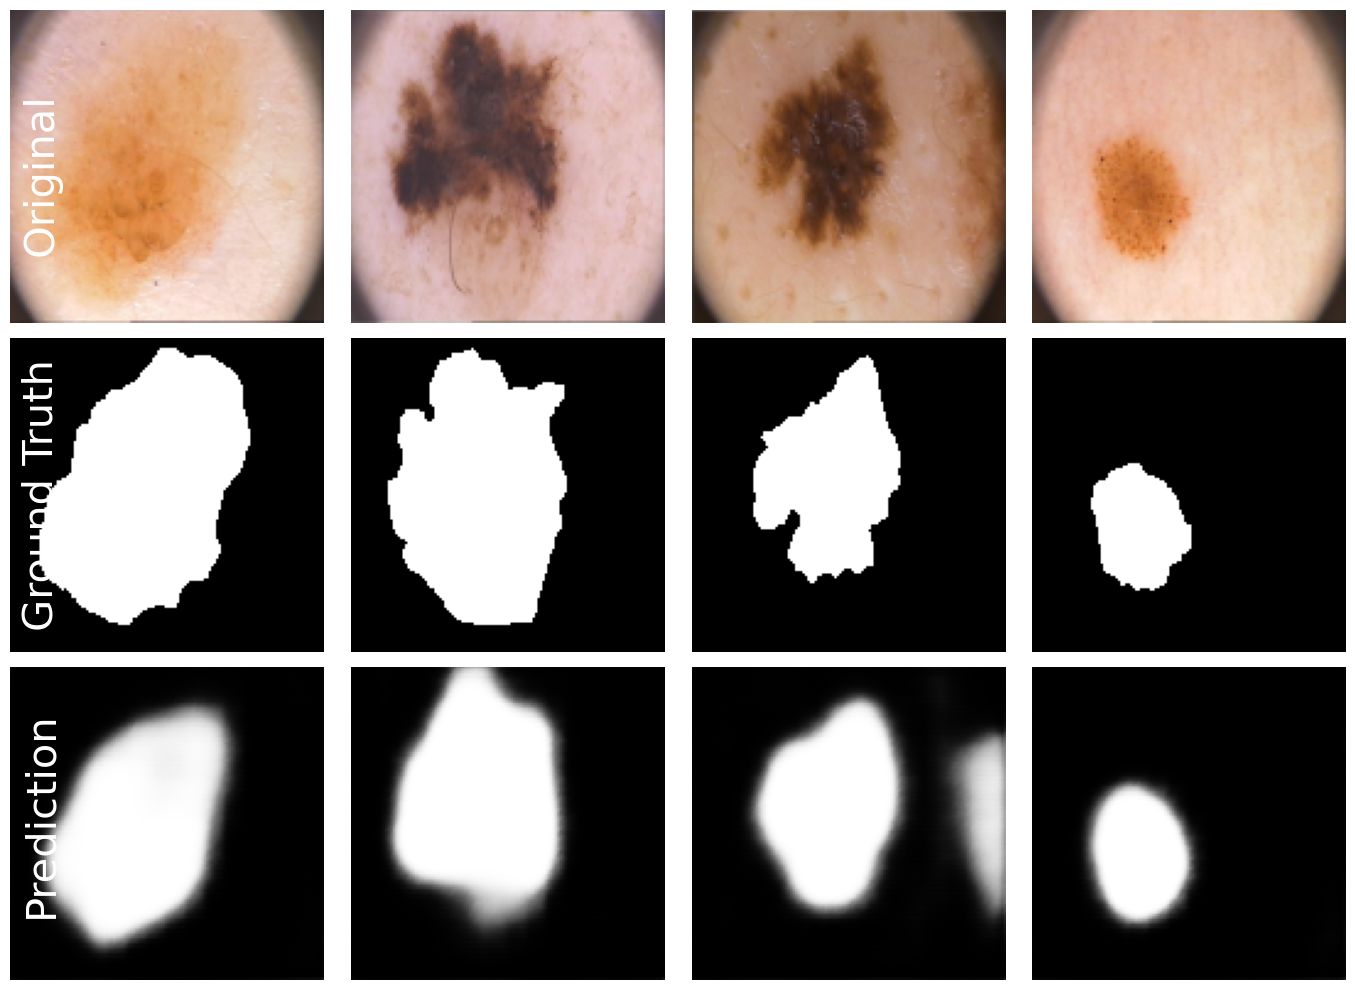

In [8]:
from EncDecPH2_TRAINING_TESTING import visualize_test_predictions
from Encoder_Decoder_PH2 import device
visualize_test_predictions(model, test_loader, device)